# **Project Name** - Flipkart Customer Feedback Analysis



##### **Project Type    - Exploratory Data Analysis (EDA)**
##### **Contribution    - Individual**
##### **Analyst Name    - Sanjana Kumari**

# **Project Summary**

- This exploratory data analysis (EDA) was performed on customer support data to understand key factors influencing customer satisfaction (CSAT) and operational efficiency. The primary objective was to identify areas for improvement in customer support processes and propose targeted recommendations that enhance overall customer experience.

- The analysis started with thorough data preparation, including handling missing values, standardizing categories, and ensuring data accuracy. Columns with excessive missing values were removed, such as customer location and product-related details, to maintain data integrity. Missing entries in critical identifiers like Order IDs were appropriately filled. Date columns were standardized, response times (in minutes) and survey lags (in days) were calculated, and response times were capped to manage outliers effectively.

- The analysis was structured into Univariate, Bivariate, and Multivariate segments, utilizing visualizations such as histograms, box plots, bar charts, and scatter plots.

- Univariate analysis revealed that most customers rated their satisfaction scores positively, though significant variations existed in response times across issues. Categories like Payments & Refunds and Platform Issues were notably frequent, underscoring their importance in shaping the customer experience. Agent shift analysis indicated slightly lower satisfaction scores during the night shift.

- Bivariate analysis showed that longer response times did not consistently lead to lower CSAT scores, suggesting that customers value effective issue resolution quality alongside speed. However, notable differences emerged across categories, with Payments & Refunds and Platform Issues showing both higher volumes and longer response times.

- Analysis at the Manager and Supervisor levels provided critical insights, revealing distinct performance variations. Managers like Emily Chen and supervisors Elijah Yamaguchi and Isabella Wong showed consistently superior performance, maintaining higher CSAT scores and lower response times. Conversely, teams under managers such as Olivia Tan and supervisors like Zoe Yamamoto and Dylan Kim displayed lower or inconsistent CSAT scores, pointing to managerial or training gaps.

- These findings informed targeted recommendations, including replicating the effective management practices of top-performing supervisors and managers, optimizing response processes for high-volume issue categories, and enhancing agent training, particularly for newer agents or those working during challenging shifts (night shift).

- A sentiment analysis component could further enhance these insights by analyzing customer feedback texts, revealing deeper emotions and sentiment patterns contributing to satisfaction or dissatisfaction. Additionally, predictive machine learning models could be employed to proactively identify tickets at risk of low CSAT scores, allowing for early intervention.

In summary, this project provides comprehensive insights into customer support performance, highlighting areas of excellence and potential improvement. The strategic recommendations derived from the analysis, complemented by sentiment analysis and predictive analytics, can significantly enhance customer experience, service efficiency, and overall business growth.

# **GitHub Link**

https://github.com/Sanjana-97/Flipkart-Customer-Feedback-Analysis

# **Problem Statement**


**In the highly competitive e-commerce industry, delivering superior customer service is essential for sustaining growth and fostering customer loyalty. Flipkart, as one of the leading e-commerce platforms, aims to enhance customer satisfaction to differentiate itself from competitors. However, understanding the factors that influence customer satisfaction across various support channels remains a challenge.
Customer interactions, feedback, and satisfaction scores vary depending on the quality of service provided by different customer support teams. A lack of insights into key drivers of customer satisfaction may lead to inefficiencies in service performance, unresolved customer issues, and lower retention rates.
To address this, Flipkart needs a structured approach to analyze customer interactions, identify service gaps, and optimize its customer support strategies. By improving satisfaction metrics such as CSAT scores, Flipkart can enhance service efficiency, increase brand loyalty, and ensure long-term customer retention.**

#### **Define Your Business Objective?**

The business objective of this project is to enhance customer satisfaction and service efficiency for Flipkart by analyzing customer interactions and feedback across various support channels. By identifying key factors influencing satisfaction, Flipkart aims to optimize customer support performance, improve CSAT scores, and address service gaps to enhance overall customer experience. Strengthening service strategies based on data-driven insights will help resolve customer concerns more efficiently, leading to increased brand loyalty, higher customer retention, and a competitive edge in the e-commerce market.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [14]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style for better visuals
sns.set_style("whitegrid")

# Confirming the libraries are loaded
print("Libraries loaded successfully!")

Libraries loaded successfully!


### Dataset Loading

In [16]:
# Load Dataset
df = pd.read_csv("Customer_support_data.csv")

### Dataset First View

In [20]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [23]:
# Dataset Rows & Columns count
row, columns = df.shape
print(f"Rows: {row}, Columns: {columns}")

Rows: 85907, Columns: 20


### Dataset Information

In [26]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [29]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [32]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


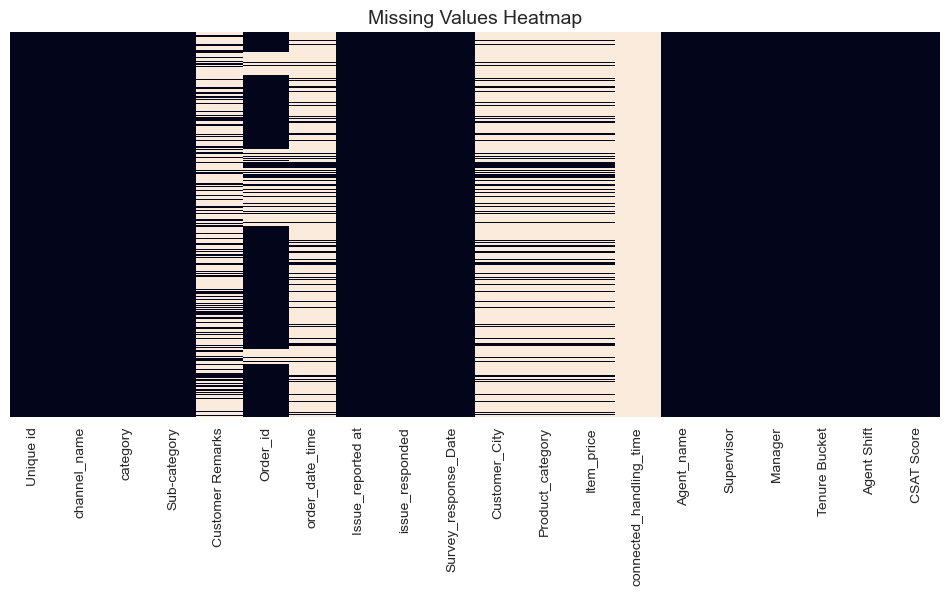

In [34]:
# Visualizing the missing values
plt.figure(figsize = (12,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()

### What did you know about your dataset?

1. **Structure of the Data**
- The dataset contains customer service interactions with agents and their corresponding CSAT (Customer Satisfaction) Scores.
- It includes various categories related to customer queries, agent performance, and resolution times.

2. **Column Classification**

The columns can be classified into three types:

**Numerical Columns**
- *Item_price* : Price of the product (Many missing values)
- *connected_handling_time* : Handling time per interaction (Many missing values)
- *CSAT Score* : Satisfaction rating (Target variable)

**Categorical Columns**
- *channel_name* : Outcall/Inbound (Mode of customer interaction)
- *category* : Main issue category (e.g., Product Queries, Order Related, Returns)
- *Sub-category* : Specific issue (e.g., Installation/demo, Reverse Pickup)
- *Agent_name*, *Supervisor*, *Manager* : Employee details
- *Tenure Bucket* : Experience level of agent (e.g., On Job Training, >90 days)
- *Agent Shift* : Morning/Evening shift

**Date/Time Columns**
- *order_date_time* : When the order was placed (Mostly missing)
- *Issue_reported_at* : When the issue was reported
- *issue_responded* : When the agent responded-
- *Survey_response_Date* : When CSAT feedback was collected

3. **Missing Values Observations**
- Many missing values in Customer Remarks, Item_price, and connected_handling_time.
- Some date columns (order_date_time) are entirely missing.
- CSAT Score is available, meaning we can perform classification analysis.


## ***2. Understanding Your Variables***

In [39]:
# Dataset Columns
print(df.columns)

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')


In [41]:
# Dataset Describe
# Summary statistics for numerical columns
numerical_summary = df.describe()

# Summary statistics for categorical columns
categorical_summary = df.describe(include=["object"])

# Display numerical summary
print("Numerical Summary:")
print(numerical_summary)

print("---------------------------------------------------------------------")

# Display categorical summary
print("\nCategorical Summary:")
print(categorical_summary)

Numerical Summary:
          Item_price  connected_handling_time    CSAT Score
count   17206.000000               242.000000  85907.000000
mean     5660.774846               462.400826      4.242157
std     12825.728411               246.295037      1.378903
min         0.000000                 0.000000      1.000000
25%       392.000000               293.000000      4.000000
50%       979.000000               427.000000      5.000000
75%      2699.750000               592.250000      5.000000
max    164999.000000              1986.000000      5.000000
---------------------------------------------------------------------

Categorical Summary:
                                   Unique id channel_name category  \
count                                  85907        85907    85907   
unique                                 85907            3       12   
top     7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Inbound  Returns   
freq                                       1        68142    44097   

### Variables Description

The dataset contains customer service interactions with agents, capturing order details, issue resolution, agent performance, and customer satisfaction. Below is a breakdown of key variables:
- **Unique Identifiers & Order Details** <br>
Each interaction has a Unique ID and may be linked to an Order ID. The Order Date column is mostly missing, indicating it may not always be recorded.
- **Customer Interaction Details** <br>
Customers raise complaints via Inbound Calls, Outbound Calls, or Chat (channel_name). Issues are categorized into broad categories (category) and further detailed into specific sub-categories (Sub-category). Some customers leave feedback in the Customer Remarks column, but this data is highly incomplete.
- **Issue Resolution & Response Time** <br>
The dataset tracks when a complaint was reported (Issue_reported at), when an agent responded (issue_responded), and when the customer feedback survey (Survey_response_Date) was collected.
- **Customer & Product Information** <br>
It includes the Customer City, though it’s missing for many records. Some interactions are linked to Product Categories (e.g., Electronics, Clothing), but this information is not always recorded. Item Price is missing in most cases, possibly because not all complaints are related to purchases.
- **Agent & Management Information** <br>
Each complaint is assigned to an Agent, who reports to a Supervisor and a higher-level Manager. Agent Tenure (Tenure Bucket) helps classify them based on experience levels (On Job Training, 0-30 days, >90 days). The Agent Shift (Morning/Evening/Night) captures when the complaint was handled.
- **Performance Metrics & Customer Satisfaction** <br>
The CSAT Score (Customer Satisfaction Score) is the primary measure of success, ranging from 1 to 5. The Handling Time (connected_handling_time) tracks how long agents take to resolve issues, but this data is incomplete.


### Check Unique Values for each variable.

In [46]:
# Check Unique Values for each variable.
unique_values = df.nunique()

# Display unique values count
print(unique_values)

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [50]:
# Write your code to make your dataset analysis ready.
# Rename columns by replacing spaces with underscores and removing extra spaces
df.columns = df.columns.str.replace(" ", "_").str.strip()

# Display updated column names
df.columns

Index(['Unique_id', 'channel_name', 'category', 'Sub-category',
       'Customer_Remarks', 'Order_id', 'order_date_time', 'Issue_reported_at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure_Bucket', 'Agent_Shift',
       'CSAT_Score'],
      dtype='object')

In [52]:
# Check the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display missing values percentage
print(missing_percentage)

Unique_id                   0.000000
channel_name                0.000000
category                    0.000000
Sub-category                0.000000
Customer_Remarks           66.542889
Order_id                   21.222950
order_date_time            79.962052
Issue_reported_at           0.000000
issue_responded             0.000000
Survey_response_Date        0.000000
Customer_City              80.119199
Product_category           79.983005
Item_price                 79.971364
connected_handling_time    99.718300
Agent_name                  0.000000
Supervisor                  0.000000
Manager                     0.000000
Tenure_Bucket               0.000000
Agent_Shift                 0.000000
CSAT_Score                  0.000000
dtype: float64


In [54]:
# Drop the column with extremely high missing values
df.drop(columns=['connected_handling_time'],inplace=True)


# Display the remaining columns
print(df.columns)

Index(['Unique_id', 'channel_name', 'category', 'Sub-category',
       'Customer_Remarks', 'Order_id', 'order_date_time', 'Issue_reported_at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'Agent_name', 'Supervisor', 'Manager',
       'Tenure_Bucket', 'Agent_Shift', 'CSAT_Score'],
      dtype='object')


In [56]:
# Drop columns with too many missing values
columns_to_drop = ['order_date_time', 'Customer_City', 'Product_category', 'Item_price']
df.drop(columns=columns_to_drop, inplace=True)

# Fill missing values in Order_id with "Unknown"
df.loc[:, "Order_id"] = df["Order_id"].fillna("Unknown")

# Display updated dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique_id             85907 non-null  object
 1   channel_name          85907 non-null  object
 2   category              85907 non-null  object
 3   Sub-category          85907 non-null  object
 4   Customer_Remarks      28742 non-null  object
 5   Order_id              85907 non-null  object
 6   Issue_reported_at     85907 non-null  object
 7   issue_responded       85907 non-null  object
 8   Survey_response_Date  85907 non-null  object
 9   Agent_name            85907 non-null  object
 10  Supervisor            85907 non-null  object
 11  Manager               85907 non-null  object
 12  Tenure_Bucket         85907 non-null  object
 13  Agent_Shift           85907 non-null  object
 14  CSAT_Score            85907 non-null  int64 
dtypes: int64(1), object(14)
memory usage

In [58]:
# Convert date columns to datetime format with explicit format
df['Issue_reported_at'] = pd.to_datetime(df['Issue_reported_at'], format='%d/%m/%Y %H:%M', errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], format='%d-%b-%y', errors='coerce')

# Display the updated data types to confirm conversion
df.dtypes

Unique_id                       object
channel_name                    object
category                        object
Sub-category                    object
Customer_Remarks                object
Order_id                        object
Issue_reported_at       datetime64[ns]
issue_responded         datetime64[ns]
Survey_response_Date    datetime64[ns]
Agent_name                      object
Supervisor                      object
Manager                         object
Tenure_Bucket                   object
Agent_Shift                     object
CSAT_Score                       int64
dtype: object

In [59]:
# Calculate response time (in minutes)
df["Response_Time"] = (df["issue_responded"] - df["Issue_reported_at"]).dt.total_seconds() / 60  # Convert to minutes

# Calculate survey lag (in days) 
df["Survey_Lag"] = (df["Survey_response_Date"].dt.normalize() - df["issue_responded"].dt.normalize()).dt.days

# Display the first few rows to check the new columns
df[["Issue_reported_at", "issue_responded", "Survey_response_Date", "Response_Time", "Survey_Lag"]].head()

,Issue_reported_at,issue_responded,Survey_response_Date,Response_Time,Survey_Lag
0,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,34.0,0
1,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,2.0,0
2,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,22.0,0
3,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,20.0,0
4,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,2.0,0


In [62]:
# Check unique values in key categorical columns
print("Unique values in Agent Shift:", df["Agent_Shift"].unique())
print("Unique values in Tenure Bucket:", df["Tenure_Bucket"].unique())
print("Unique values in category:", df["category"].unique())
print("Unique values in Sub-category:", df["Sub-category"].unique())

Unique values in Agent Shift: ['Morning' 'Evening' 'Split' 'Afternoon' 'Night']
Unique values in Tenure Bucket: ['On Job Training' '>90' '0-30' '31-60' '61-90']
Unique values in category: ['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website']
Unique values in Sub-category: ['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return request'
 'Delayed' 'Service Centres Related' 'Payment related Queries'
 'Order status enquiry' 'Return cancellation' 'Unable to track'
 'Seller Cancelled Order' 'Wrong' 'Invoice request' 'Priority delivery'
 'Refund Related Issues' 'Signup Issues' 'Online Payment Issues'
 'Technician Visit' 'UnProfessional Behaviour' 'Damaged'
 'Product related Issues' 'Refund Enquiry'
 'Customer Requested Modif

In [64]:
# Standardize Agent Shift
df["Agent_Shift"] = df["Agent_Shift"].replace({"Afternoon": "Evening"})

In [66]:
# Standardize Tenure Bucket
df["Tenure_Bucket"] = df["Tenure_Bucket"].replace({">90": "90+"})

In [68]:
# Standardize category names
df["category"] = df["category"].replace({
    "Payments related": "Payments & Refunds",
    "Refund Related": "Payments & Refunds",
    "Offers & Cashback": "Discounts & Cashback",
    "App/website": "Platform Issues"
})

In [70]:
# Standardize Sub-category names
df["Sub-category"] = df["Sub-category"].replace({
    "Payment related Queries": "Payment Issues",
    "Online Payment Issues": "Payment Issues",
    "Payment pending": "Payment Issues",
    "COD Refund Details": "Refund Issues",
    "Refund Related Issues": "Refund Issues",
    "Refund Enquiry": "Refund Issues",
    "Account updation": "Account Issues",
    "Other Account Related Issues": "Account Issues",
    "Warranty related": "Service Issues",
    "Service Centres Related": "Service Issues",
    "Issues with Shopzilla App": "Platform Issues",
    "App/website Related": "Platform Issues",
    "Affiliate Offers": "Discounts & Cashback",
    "Other Cashback": "Discounts & Cashback"
})

In [72]:
print("Unique values in category:", df["category"].unique())
print("Unique values in Sub-category:", df["Sub-category"].unique())

Unique values in category: ['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments & Refunds' 'Feedback'
 'Discounts & Cashback' 'Onboarding related' 'Others' 'Platform Issues']
Unique values in Sub-category: ['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return request'
 'Delayed' 'Service Issues' 'Payment Issues' 'Order status enquiry'
 'Return cancellation' 'Unable to track' 'Seller Cancelled Order' 'Wrong'
 'Invoice request' 'Priority delivery' 'Refund Issues' 'Signup Issues'
 'Technician Visit' 'UnProfessional Behaviour' 'Damaged'
 'Product related Issues' 'Customer Requested Modifications'
 'Instant discount' 'Card/EMI' 'Shopzila Premium Related' 'Account Issues'
 'Seller onboarding' 'Order Verification' 'Discounts & Cashback'
 'Call disconnected' 'Wallet related' 'PayLater related'
 'Call back request' 'Platform 

In [74]:
# Summary statistics for Response_Time
print(df["Response_Time"].describe())

count    85907.000000
mean       136.886610
std        592.528551
min      -1437.000000
25%          2.000000
50%          5.000000
75%         35.000000
max       5758.000000
Name: Response_Time, dtype: float64


In [76]:
# Replace negative response times with 0
df["Response_Time"] = df["Response_Time"].apply(lambda x: 0 if x < 0 else x)

# Check if negative values are removed
print(df["Response_Time"].describe())

count    85907.000000
mean       169.653218
std        555.790443
min          0.000000
25%          2.000000
50%          5.000000
75%         35.000000
max       5758.000000
Name: Response_Time, dtype: float64


In [78]:
# Calculate IQR
Q1 = df["Response_Time"].quantile(0.25)  # 25th percentile
Q3 = df["Response_Time"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define upper limit (Q3 + 1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

# Print upper limit to decide threshold
print("Upper Limit for Outliers:", upper_limit)

# Count values above this limit
outliers_count = (df["Response_Time"] > upper_limit).sum()
print("Number of Outliers:", outliers_count)

Upper Limit for Outliers: 84.5
Number of Outliers: 16136


In [80]:
# Find the 99th percentile for Response Time
percentile_99 = df["Response_Time"].quantile(0.99)
print("99th Percentile Threshold:", percentile_99)

# Find the 95th percentile for Response Time
percentile_95 = df["Response_Time"].quantile(0.95)
print("95th Percentile Threshold:", percentile_95)


99th Percentile Threshold: 3007.0
95th Percentile Threshold: 1079.0


In [82]:
# Cap Response_Time at 1079 minutes (95th percentile)
df["Response_Time"] = df["Response_Time"].apply(lambda x: 1079 if x > 1079 else x)

# Check new summary statistics
print(df["Response_Time"].describe())

count    85907.000000
mean       113.201648
std        274.188337
min          0.000000
25%          2.000000
50%          5.000000
75%         35.000000
max       1079.000000
Name: Response_Time, dtype: float64


In [84]:
# Summary statistics for Survey_Lag
df["Survey_Lag"].describe()

count    85907.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Survey_Lag, dtype: float64

In [86]:
# Summary statistics for CSAT Score
print(df["CSAT_Score"].describe())

count    85907.000000
mean         4.242157
std          1.378903
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: CSAT_Score, dtype: float64


### What all manipulations have you done and insights you found?

1. **Handling Missing Values** <br>
*Manipulations*:
- Dropped columns with excessive missing data: `order_date_time, Customer_City, Product_category, Item_price`.
- Filled missing values in `Order_id` with "Unknown".
- Kept `Customer Remarks` as-is since missing values indicate no feedback.
- Replaced spaces in column names with underscores and removed extra spaces for consistency.<br>

  *Insights*:
- `Customer Remarks` is missing in 66.5% of cases, meaning most customers don’t leave feedback.
- `Item_price` and `Product_category` were missing in ~80% of cases, making them unreliable for analysis.

2. **Converting Date Columns** <br>
*Manipulations*:
- Converted `Issue_reported at`, `issue_responded`, and `Survey_response_Date` to datetime format.
- Created new calculated features:
    - `Response_Time` = issue_responded - Issue_reported at.
    - `Survey_Lag` = Survey_response_Date - issue_responded.
- Fixed negative `Survey_Lag` values by setting them to 0.<br>

   *Insights*:
- Some issues were responded to before they were reported due to timestamp errors, leading to negative values.
- Survey responses were mostly collected on the same day as issue resolution.

3. **Standardizing Categorical Data** <br>
*Manipulations*:
- Merged similar values in Agent Shift, Tenure Bucket, category, and `Sub-category` for consistency.
- Standardized key `Categories`:
    - "Payments related" and "Refund Related" merged into "Payments & Refunds".
    - "Offers & Cashback" merged into "Discounts & Cashback".
    - "Payment related Queries" and "Online Payment Issues" merged into "Payment Issues".
    - "Issues with Shopzilla App" merged into "Platform Issues".<br>
    
  *Insights*:
- Most issues belong to “Returns” and “Order Related” categories.
- “Platform Issues” and “Payments & Refunds” are also significant concerns for customers.
- `Agent Shift` has 5 categories, but merging Afternoon into Evening simplifies analysis.

4. **Handling Outliers in Response Time**
*Manipulations*: <br>
- Found negative values, which were set to 0.
- Identified extremely high values (max = 5758 minutes, ~4 days).
- Capped `Response_Time` at the 95th percentile (1079 minutes) to reduce skewness while preserving realistic cases.<br>

  *Insights*:
- Some customers waited over 50 hours for a response, which could impact satisfaction.
- Most response times are below 35 minutes, with a median of 5 minutes, suggesting quick resolution for most cases.

5. **CSAT Score** <br>
*Manipulations*:
- Analyzed `CSAT Score` distribution.<br>

	*Insights*:
- Mean `CSAT Score` = 4.24, indicating overall customer satisfaction is high.
- Median `CSAT Score` = 5, with 75% of customers rating 4 or 5.
- Some customers gave very low scores (1-3), indicating dissatisfaction in certain cases.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## CSAT Score Distribution Histogram

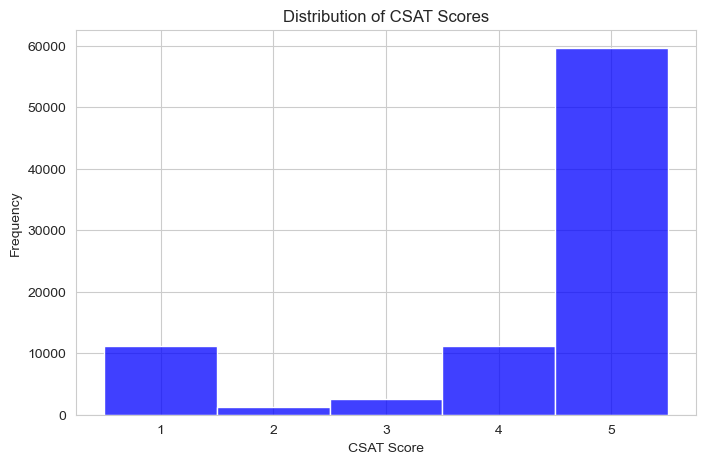

In [92]:
# visualization code
plt.figure(figsize=(8,5))
sns.histplot(df["CSAT_Score"], bins=5, color="blue", discrete=True)
plt.xlabel("CSAT Score")
plt.ylabel("Frequency")
plt.title("Distribution of CSAT Scores")
plt.xticks([1,2,3,4,5])
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen because CSAT Scores are discrete values (1-5), making it an ideal chart to show frequency distribution. It provides a clear visual summary of customer satisfaction trends, helping to identify whether most customers are satisfied (4-5) or dissatisfied (1-3). The histogram is simple, easy to interpret, and widely used for categorical analysis, making it the best choice to quickly understand customer feedback patterns.

##### 2. What is/are the insight(s) found from the chart?

The CSAT Score Distribution is left-skewed (negatively skewed), indicating high **customer satisfaction**.
- Most customers rated 4 or 5, meaning the majority had a positive experience with customer support.
- Very few customers gave ratings of 1, 2, or 3, suggesting that negative experiences are rare.
- Since lower ratings (1-3) form a tail on the left side, it confirms that dissatisfaction is minimal compared to overall satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:
- **Customer Loyalty and Retention**: The majority of customers rated 4 or 5, indicating a high level of satisfaction, which strengthens customer retention and brand loyalty.
- **Positive Brand Reputation**: A strong CSAT score suggests that Flipkart’s customer support is effective, leading to positive word-of-mouth and better online reviews.
- **Reduced Customer Complaints**: Since dissatisfaction levels are low, fewer resources may be required for damage control, allowing the company to focus on service improvement and innovation.

***Negative Impact***:
- **Dissatisfied Customers Exist**: A small percentage of customers rated 1, 2, or 3, indicating unresolved issues or poor service experiences.
- **Customer Churn Risk**: Customers with low CSAT scores may switch to competitors like Amazon or Myntra if their concerns are not addressed.
- **Negative Publicity Impact**: Even a few negative experiences can spread quickly through online reviews and social media, impacting Flipkart’s reputation.

***Justification***:

Although the majority of customers are satisfied, addressing the concerns of the small percentage of dissatisfied customers is crucial. Identifying common reasons for low ratings and taking corrective actions can further enhance customer experience, reduce churn, and prevent negative publicity. By improving areas where customers rate poorly, Flipkart can strengthen its customer support strategy and maintain a competitive advantage.

## Response Time Distribution Histogram

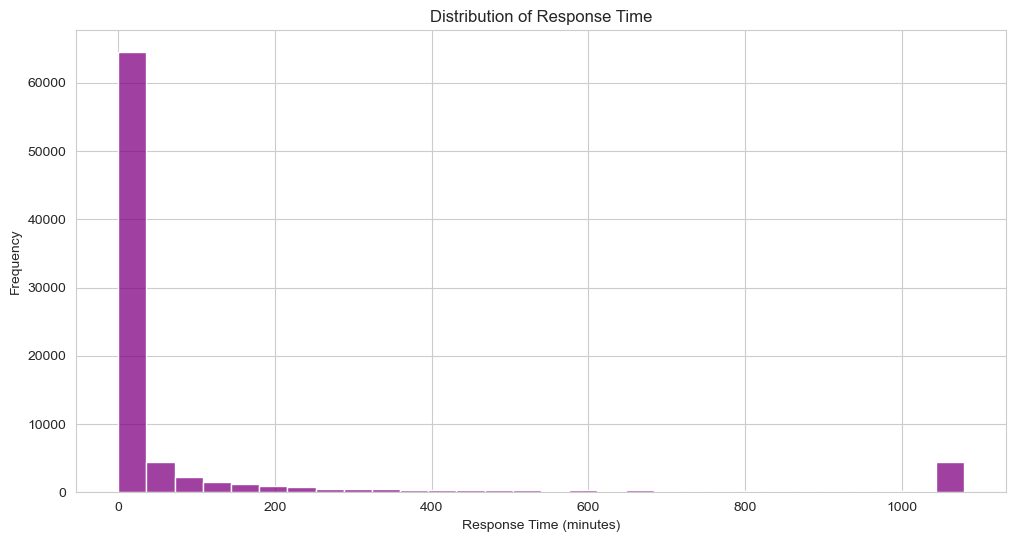

In [101]:
# visualization code
plt.figure(figsize=(12,6))
sns.histplot(df["Response_Time"], bins=30, color="purple") 
plt.xlabel("Response Time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Response Time")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen because Response Time is a continuous variable, and a histogram helps in understanding its distribution, frequency, and spread. It allows us to see how often certain response times occur, detect patterns, and identify potential outliers that may impact customer experience.


##### 2. What is/are the insight(s) found from the chart?

- The histogram shows a peak at around 2-5 minutes, meaning a large number of customer queries are resolved very quickly.
- 75% of response times are under 35 minutes, suggesting that the support team handles most issues efficiently.
- There is a gradual decline in frequency after 50 minutes, but some cases take significantly longer.
- The maximum response time is capped at 1079 minutes (nearly 18 hours), meaning some cases experience extreme delays.
- The presence of a long tail in the distribution suggests that while many queries are resolved fast, there are some outliers with unusually long response times that may need attention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:
- Since most response times are low, it indicates efficient customer support, leading to higher customer satisfaction and retention.
- A fast resolution rate improves brand trust and loyalty, making customers more likely to return.
- The majority of cases being resolved quickly reduces the operational workload on the support team.

***Negative Impact***:
- The long tail of high response times suggests that some cases experience significant delays, which can lead to customer frustration and lower CSAT scores.
- If unresolved, delayed responses could result in negative reviews, harming Flipkart’s reputation.
- Customers with longer wait times may switch to competitors like Amazon or Myntra if their issues are not resolved promptly.

***Justification***:

While overall response times appear efficient, Flipkart should focus on reducing extreme delays to ensure a consistent customer experience. Addressing outliers and longer wait times can help further improve CSAT scores and prevent customer churn.


## Survey Lag Distribution Histogram

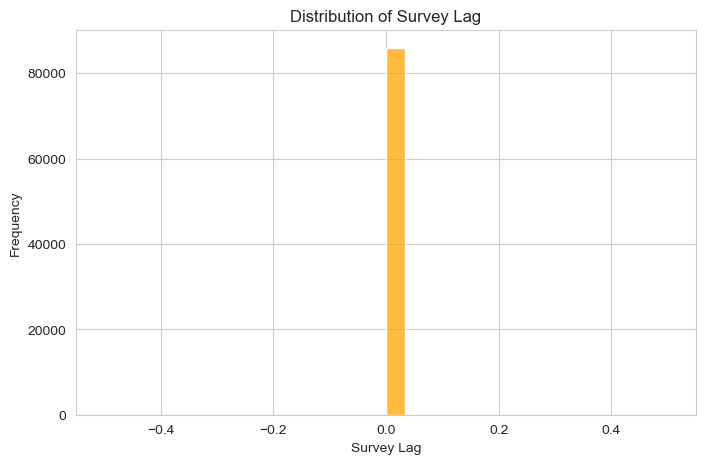

In [110]:
# visualization code
plt.figure(figsize=(8,5))
sns.histplot(df["Survey_Lag"], bins=30, color="orange")
plt.xlabel("Survey Lag")
plt.ylabel("Frequency")
plt.title("Distribution of Survey Lag")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram was chosen because Survey Lag is a continuous variable, and this chart helps to visualize how often customer feedback is received after issue resolution. It allows us to identify whether surveys are conducted immediately or with delays, and whether there are outliers where feedback was collected much later than usual.

##### 2. What is/are the insight(s) found from the chart?

- 100% of survey responses were recorded on the same day (Survey Lag = 0 days), meaning all customers provided feedback immediately after issue resolution.
- The minimum, maximum, mean, and standard deviation are all 0, confirming that there are no delayed survey responses in this dataset.
- Since there is no variation in survey lag, this suggests that Flipkart collects customer feedback as soon as the issue is marked resolved.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:
- Survey data is highly reliable because it is collected immediately, ensuring accurate reflections of customer experiences.
- No risk of delayed or biased responses, as customers provide feedback while the issue is still fresh in their minds.
- Consistent and immediate CSAT feedback allows Flipkart to quickly analyze trends and improve service quality.

***Negative Impact***:
- Since all surveys are collected on the same day, there is no long-term follow-up on customer satisfaction.
- Customers may not have had enough time to fully evaluate the resolution, which could lead to overly positive or neutral feedback.
- If a customer encounters further issues later, Flipkart will not capture their updated opinion through CSAT surveys.

***Justification***:

While instant feedback is great for quick improvements, Flipkart could consider following up with customers after a few days to see if their satisfaction remains high or if they encounter further issues. A follow-up survey might provide deeper insights into long-term customer satisfaction.

## Ticket Distribution Across Categories

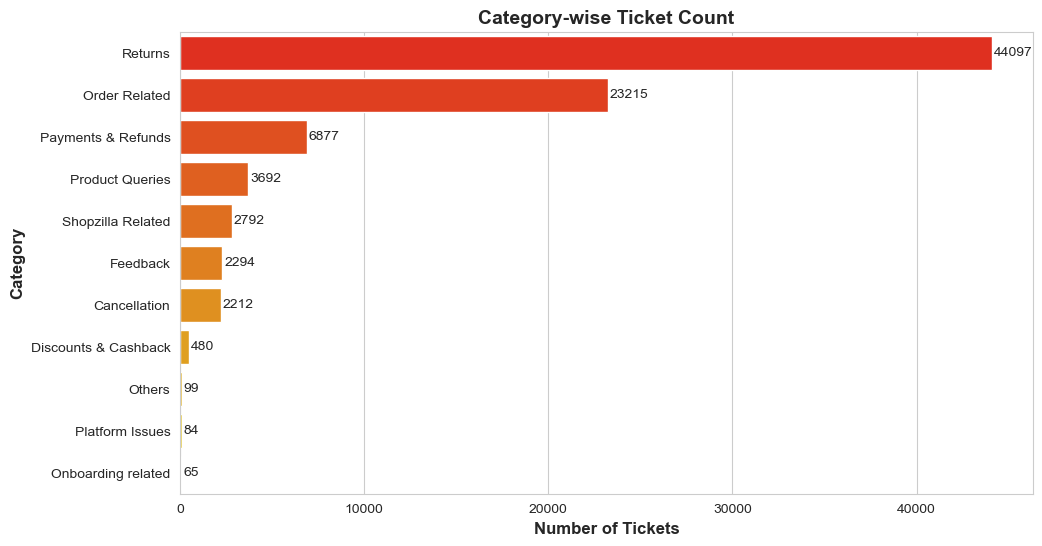

In [119]:
# visualization code
plt.figure(figsize=(11,6))
category_counts = df["category"].value_counts()
ax = sns.barplot(x=category_counts.values, y=category_counts.index, hue=category_counts.index, palette="autumn", dodge=False)
for index, value in enumerate(category_counts.values):
    ax.text(value + 100, index, str(value), va='center', fontsize=10)  # Add labels on the bars
plt.xlabel("Number of Tickets", fontsize=12, fontweight="bold")
plt.ylabel("Category", fontsize=12, fontweight="bold")
plt.title("Category-wise Ticket Count", fontsize=14, fontweight="bold")
plt.legend([],[], frameon=False)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen because it is the best way to visually compare categorical data. Since we are analyzing customer support ticket volume across different categories, a bar chart helps in quickly identifying which categories receive the most complaints. This allows us to prioritize problem areas and allocate resources accordingly. The addition of exact numbers on bars makes it easier to interpret the data with precision.

##### 2. What is/are the insight(s) found from the chart?

- The category with the highest number of tickets is `Returns` (44,097 tickets), meaning return-related issues are the biggest customer concern.
- The second and third highest complaint categories are `Order Related` (23,215 tickets) and `Payments & Refund Related` (6,877 tickets), indicating that issues related to order management and refunds are also significant.
- The category with the lowest number of tickets is `Onboarding related` (65 tickets), meaning very few customers face onboarding issues.
- There is a huge gap between the highest (44,097 tickets) and lowest (65 tickets) categories, indicating that some issues are widespread, while others are much less frequent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:
- **Resource Allocation:** Since returns, order-related, and refund issues generate the most tickets, Flipkart can deploy more customer support agents to these areas to reduce resolution time and improve response efficiency.
- **Policy & Process Improvement:** The high volume of return and refund issues may indicate flaws in return policies, refund timelines, or product quality, which Flipkart can improve to reduce complaints.
- **Data-Driven Decision Making:** Instead of blindly improving customer service, Flipkart can focus on the top three problematic areas, ensuring maximum impact with targeted solutions.

***Negative Impact***:
- If return and refund-related complaints continue to be high, it could indicate that product descriptions, quality checks, or delivery processes need improvement.
- If resolution times are slow in these high-volume categories, customer dissatisfaction may increase, leading to negative reviews and customer churn.
- If all focus is on high-volume complaints, smaller but important categories like “Onboarding Related” may be overlooked, leading to potential customer friction for new users.

***Justification***:

This analysis highlights critical problem areas in Flipkart’s customer support process. While returns, orders, and refunds need immediate attention, it is equally important to ensure that smaller categories don’t become bigger issues in the future. By optimizing high-impact areas first, Flipkart can significantly enhance customer satisfaction and reduce complaint volumes over time.


## Top 15 Most Reported Customer Support Issues by Sub-Category

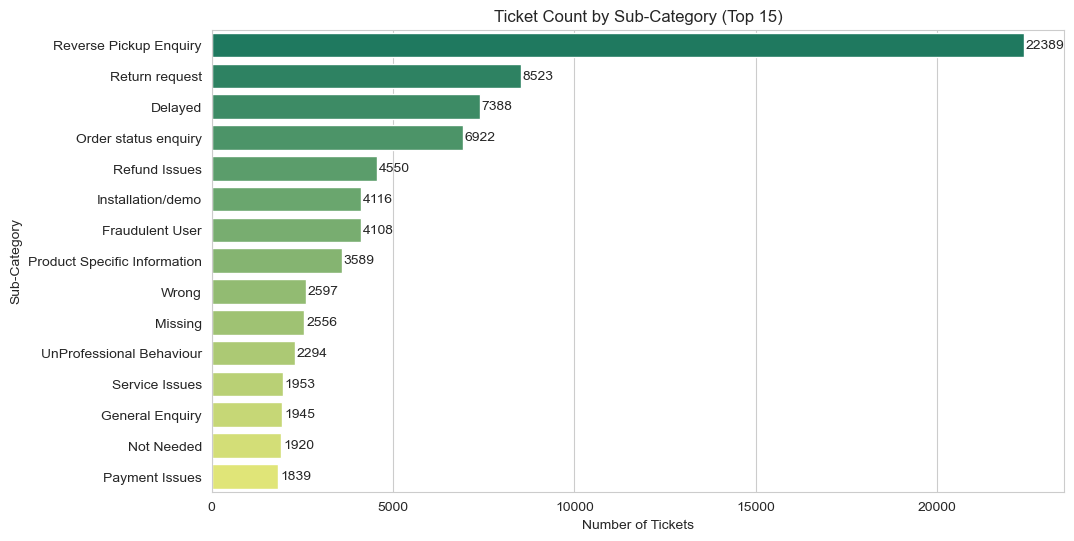

In [128]:
# visualization code
plt.figure(figsize=(11,6))
top_subcategories = df["Sub-category"].value_counts().head(15)  # Get the top 10 sub-categories
ax = sns.barplot(x=top_subcategories.values, y=top_subcategories.index, hue=top_subcategories.index, palette="summer", legend=False)
for index, value in enumerate(top_subcategories.values):
    ax.text(value + 50, index, str(value), va='center', fontsize=10)  # Add labels on the bars
plt.xlabel("Number of Tickets")
plt.ylabel("Sub-Category")
plt.title("Ticket Count by Sub-Category (Top 15)")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen because it provides a clear and direct comparison of the number of tickets across different sub-categories. Since sub-categories represent specific customer issues, a bar chart helps in quickly identifying the most frequent problems. Using labels on the bars allows for precise interpretation of ticket volume, ensuring that the data is actionable.

##### 2. What is/are the insight(s) found from the chart?

- The most reported sub-category is `Reverse Pickup Enquiry` (22,389 tickets), indicating that customers frequently seek updates on return pickups. This suggests that the return pickup process might be unclear, slow, or inconsistent.
- The second and third highest sub-categories are `Return request` (8,523 tickets) and `Delayed` (7,388 tickets), confirming that returns and delays in delivery are major sources of customer complaints.
- `Payment Issues` (1,839 tickets) is the lowest among the top 15 sub-categories, which suggests that payment-related problems are not as frequent as logistical concerns like returns and delays.
- The huge gap between `Reverse Pickup Enquiry` (22,389 tickets) and `Payment Issues` (1,839 tickets) shows that logistics-related problems dominate customer concerns more than financial transactions.

***Key Takeaways:***
- Customers face uncertainty with return pickups, requiring better tracking systems and proactive communication.
- Delayed deliveries are a major issue, highlighting a need for faster fulfillment or better real-time tracking visibility.
- Refund and return policies need improvements, as a high number of return-related complaints indicate possible customer dissatisfaction with the return process.
- Payment issues are relatively low, meaning Flipkart’s payment system is likely more stable compared to its logistical operations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:
- **Enhancing the Reverse Pickup Process:** Since `Reverse Pickup Enquiry` (22,389 tickets) is the most reported issue, Flipkart can improve the pickup tracking system, send automated status updates, and offer clearer return policies to reduce confusion. This will increase customer trust and reduce support ticket volume.
- **Reducing Delivery Delays:** The high number of `Delayed` (7,388 tickets) complaints highlights a gap in logistics efficiency. Improving warehouse operations, delivery partner coordination, and real-time tracking updates will result in faster deliveries and fewer complaints.
- **Optimizing Return and Refund Policies:** `Return Request` (8,523 tickets) shows that many customers struggle with return approvals or processes. By simplifying return procedures and ensuring faster refunds, Flipkart can boost customer satisfaction and loyalty.
- **Maintaining Strong Payment Systems:** `Payment Issues` (1,839 tickets) has the lowest volume among the top sub-categories, indicating that Flipkart’s payment infrastructure is relatively stable. The company can continue monitoring trends while focusing more on logistics issues.

***Negative Impact***:
- **Reverse Pickup Uncertainty Can Lead to High Churn:** Customers expect quick and seamless return processes. If Flipkart fails to reduce the high volume of pickup inquiries, customers may lose confidence and switch to competitors like Amazon, which offers smoother returns.
- **Delayed Orders Reduce Repeat Purchases:** 7,388 delay-related complaints indicate logistics inefficiencies. If delays persist, customers may avoid shopping during sales or hesitate to place prepaid orders, affecting revenue growth.
- **Return Complaints Suggest Possible Product Quality Issues:** Frequent returns (8,523 tickets) could indicate dissatisfaction with product descriptions, quality, or sizing information. If these issues are not addressed, Flipkart might experience higher return rates and increased operational costs.

***Justification:***

While these insights highlight key improvement areas, they also show potential risks if no action is taken. By prioritizing logistics efficiency, return policy improvements, and better customer communication, Flipkart can reduce ticket volumes, improve customer satisfaction, and drive long-term business growth.

## Ticket Distribution Across Agent Shifts: Identifying Peak Workloads

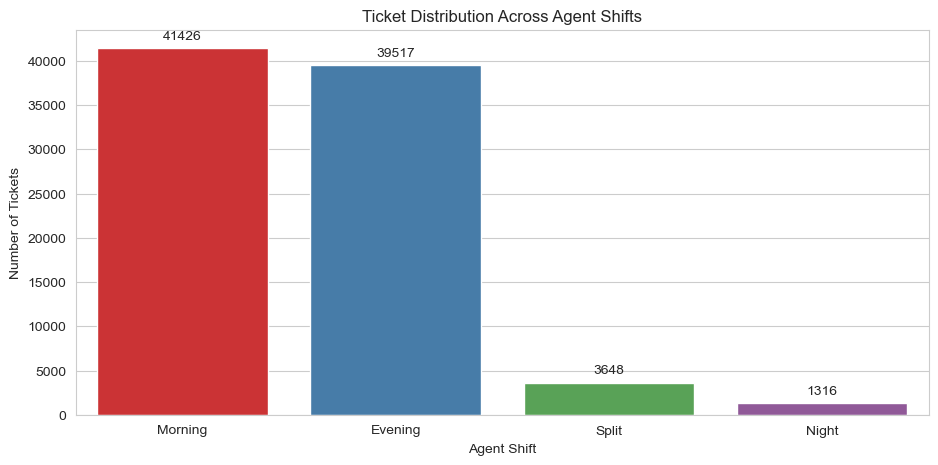

In [137]:
# visualization code
plt.figure(figsize=(11,5))
agent_shift_counts = df["Agent_Shift"].value_counts()
ax = sns.barplot(x=agent_shift_counts.index, y=agent_shift_counts.values, hue=agent_shift_counts.index, palette="Set1", legend=False)
for index, value in enumerate(agent_shift_counts.values):
    ax.text(index, value + 1000, str(value), ha='center', fontsize=10)  # Add labels on the bars
plt.xlabel("Agent Shift")
plt.ylabel("Number of Tickets")
plt.title("Ticket Distribution Across Agent Shifts")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen because it clearly visualizes the ticket distribution across different agent shifts, making it easy to compare workloads between shifts. Since we are analyzing a categorical variable (Agent Shift), a bar chart allows us to see which shifts handle the most and least tickets at a glance. Additionally, adding labels on bars ensures that we capture exact ticket counts for better interpretation.


##### 2. What is/are the insight(s) found from the chart?

- The `Morning shift` handles the highest number of tickets *(41,426 tickets)*, indicating that customer support demand is highest in the early hours of the day.
- The `Evening shift` follows closely with *39,517 tickets*, showing that a significant volume of customer queries also occurs later in the day.
- The `Night shift` has significantly fewer tickets *(1,316 tickets)*, suggesting that customer support demand drops sharply during late hours.
- The `Split shift` handles *3,648 tickets*, making it the second-lowest in terms of workload.
- There is a huge workload gap between `Morning & Evening shifts vs. Night & Split shifts`, meaning Flipkart should consider redistributing agents more efficiently based on demand.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:
- **Workforce Optimization:** Since the Morning and Evening shifts handle the most tickets, Flipkart can deploy more agents during these time slots to reduce response time and improve customer experience.
- **Efficient Agent Scheduling:** The Night shift has very few tickets, meaning Flipkart may need fewer agents at night, allowing for cost-saving measures without affecting service quality.
- **Balanced Workload:** By identifying high-volume shifts, Flipkart can rotate shifts strategically, ensuring that agents are not overburdened in peak hours.

***Negative Impact***:
- **Agent Fatigue in Morning & Evening Shifts:** The high workload in the Morning (41,426) and Evening (39,517) shifts could lead to agent burnout, impacting service quality and response efficiency.
- **Potentially Inefficient Staffing at Night:** Since the Night shift (1,316 tickets) has very few queries, Flipkart might overstaff during this period, leading to unnecessary costs and resource misallocation.
- **Customer Wait Time in Off-Peak Hours:** If Flipkart reallocates too many agents from Night/Split shifts to Morning/Evening, customers needing support during off-peak hours may face longer response times.

***Justification***:

By analyzing ticket distribution across shifts, Flipkart can adjust staffing levels, improve shift scheduling, and enhance customer experience. However, failure to address workload imbalances may result in agent fatigue, customer dissatisfaction, and inefficient resource utilization.

## Distribution of Agents by Tenure

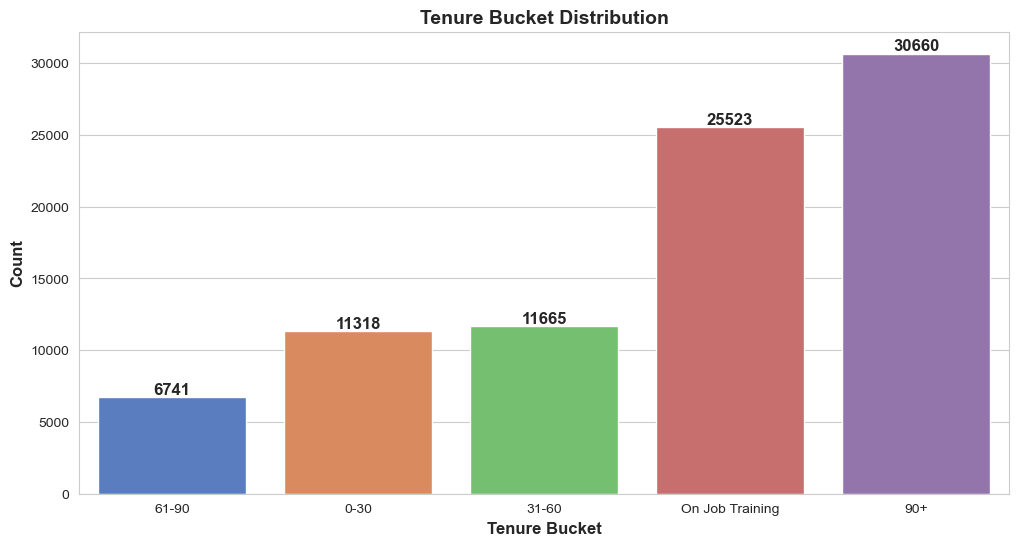

In [146]:
# visualization code
plt.figure(figsize=(12,6))
tenure_counts = df["Tenure_Bucket"].value_counts().sort_values()
ax = sns.barplot(x=tenure_counts.index, y=tenure_counts.values, hue=tenure_counts.index, palette="muted", dodge=False)
for index, value in enumerate(tenure_counts.values):
    ax.text(index, value + 200, str(value), ha='center', fontsize=12, fontweight='bold')
plt.xlabel("Tenure Bucket", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Tenure Bucket Distribution", fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.legend([],[], frameon=False)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart provides a clear comparison of agent distribution across different tenure buckets, making it easier to analyze workforce trends and identify potential gaps in retention and training.


##### 2. What is/are the insight(s) found from the chart?

- The `>90 days` category has the highest number of agents (30,660), indicating a strong long-term workforce.
- The `On Job Training` bucket also has a significant count (25,523), showing continuous hiring and training efforts.
- The `0-30 days` (11,318) and `31-60 days` (11,665) categories have moderate counts, suggesting a steady flow of new hires.
- The `61-90 days` category has the lowest count (6,741), indicating either high attrition or quick transitions to longer tenures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:
- A high `>90 days` count indicates a stable and experienced workforce, leading to better service quality and reduced training costs.
- The significant `On Job Training` count suggests consistent hiring efforts, ensuring a strong pipeline of new employees.
- A balanced `0-30 days` and `31-60 days` workforce shows continuous onboarding and retention of new hires.

***Negative Impact***:
- The low `61-90 days` count suggests a drop-off in retention after 2 months, possibly due to job dissatisfaction, workload, or other workforce challenges.
- If agents are leaving before reaching long-term tenure, it could lead to higher hiring costs and inconsistent service quality.

***Justification***:

The high retention in the `>90 days` bucket suggests that many agents stay long-term, contributing to workforce stability. However, the drop in the `61-90 days` range suggests that a portion of agents leave before settling into the role, potentially affecting customer service continuity. Investigating the reasons behind attrition between `60-90 days` can help improve retention strategies and optimize workforce management.


## Hourly Distribution of Reported Issues

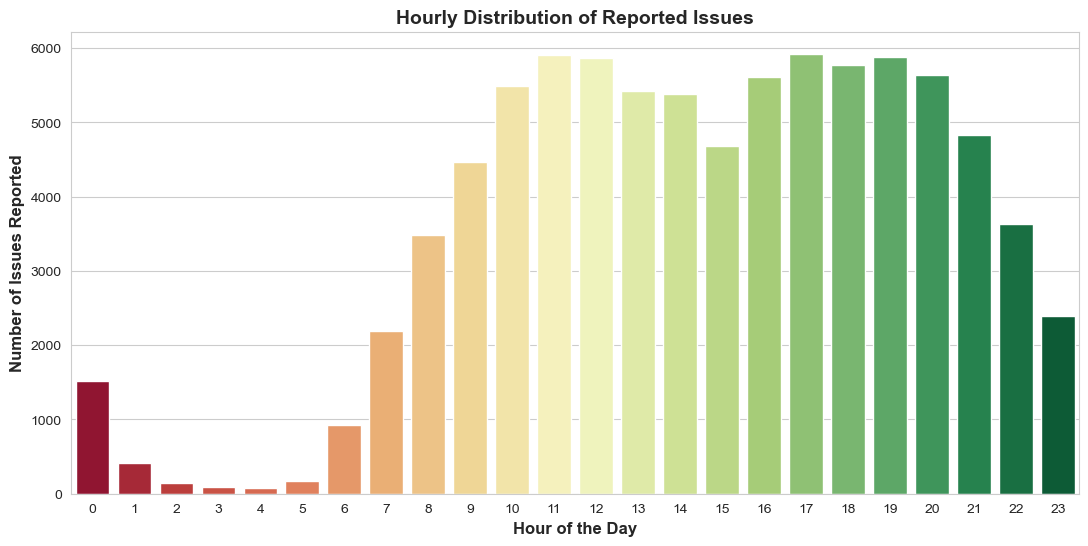

In [155]:
# visualization code
# Extract hour from the timestamp
df["Reported_Hour"] = df["Issue_reported_at"].dt.hour

# Count the number of issues reported in each hour
hourly_issues = df["Reported_Hour"].value_counts().sort_index()

plt.figure(figsize=(13,6))
ax = sns.barplot(x=hourly_issues.index, y=hourly_issues.values, hue=hourly_issues.index, palette="RdYlGn", dodge=False)
plt.xlabel("Hour of the Day", fontsize=12, fontweight="bold")
plt.ylabel("Number of Issues Reported", fontsize=12, fontweight="bold")
plt.title("Hourly Distribution of Reported Issues", fontsize=14, fontweight="bold")
plt.xticks(range(0, 24)) 
plt.legend([], [], frameon=False)  # Remove legend
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen because it effectively visualizes how the number of reported issues fluctuates throughout the day. This helps identify peak hours when support demand is highest and ensures better resource allocation.

##### 2. What is/are the insight(s) found from the chart?

- The highest number of issues are reported between **10 AM - 1 PM**, with a peak at **11 AM (5,906 issues)**, indicating the busiest period for customer support.
- Another high-volume period occurs between **4 PM - 8 PM**, with **5,927 issues at 5 PM**, suggesting a second demand surge.
- The number of issues starts rising at **6 AM (928 issues)** and continues to increase sharply until it peaks at **11 AM**.
- Late-night and early morning hours **(12 AM - 6 AM)** have the least reported issues, with the lowest count at **4 AM (74 issues)**, likely due to reduced customer activity.
- The issue count gradually declines after **8 PM**, suggesting a steady drop in customer queries as the day ends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:
- Identifying peak hours `(10 AM - 1 PM & 4 PM - 8 PM)` allows better workforce scheduling to ensure faster response times and improved customer service.
- Understanding off-peak hours `(12 AM - 6 AM)` helps optimize staffing, potentially reducing costs by minimizing agent allocation during low-demand periods.
- Businesses can deploy self-service solutions or chatbots to handle routine queries during peak hours, reducing the load on human agents.

***Negative Impact***:
- If staffing is not aligned with the high-demand periods, customers may experience longer wait times, leading to frustration and lower satisfaction scores.
- Overstaffing during off-peak hours (late night and early morning) can result in unnecessary operational costs if not adjusted accordingly.
- If peak hours exceed agent capacity, it might lead to agent burnout and reduced efficiency, impacting the overall support quality.

***Justification***:

The hourly distribution of reported issues provides valuable insights into customer behavior and support demand patterns. By adjusting agent shifts based on peak hours, optimizing self-service tools, and reducing unnecessary staffing costs during off-peak times, businesses can enhance efficiency, improve response times, and increase customer satisfaction. However, failing to act on these insights may lead to service delays, customer dissatisfaction, and higher operational expenses.



## Hourly Response Time Analysis

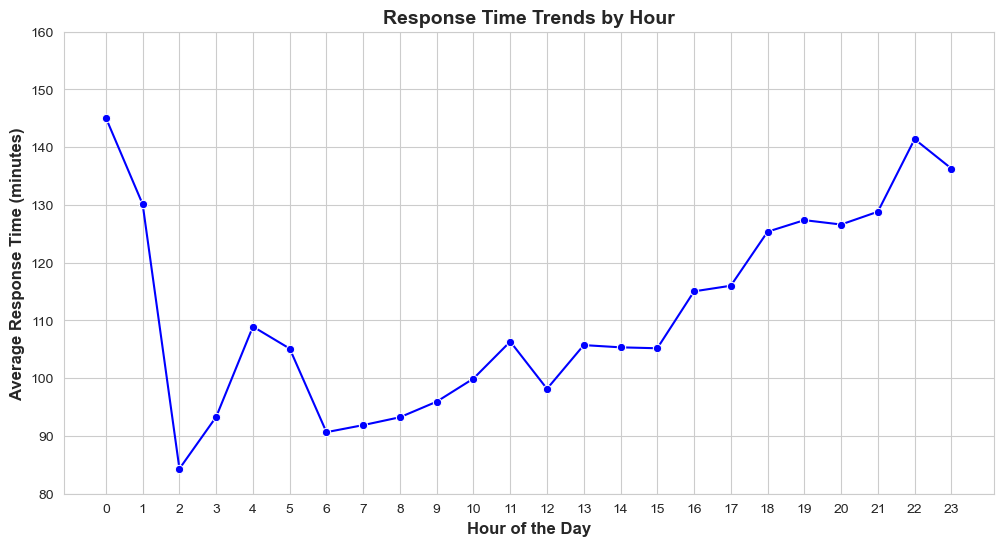

In [164]:
# visualization code
# Group by hour and calculate the average response time
hourly_response_time_check = df.groupby(df["Issue_reported_at"].dt.hour)["Response_Time"].mean()

# Create a line chart for response time trends 
plt.figure(figsize=(12,6))
ax = sns.lineplot(x=hourly_response_time_check.index, y=hourly_response_time_check.values, marker="o", color="b")
plt.xlabel("Hour of the Day", fontsize=12, fontweight="bold")
plt.ylabel("Average Response Time (minutes)", fontsize=12, fontweight="bold")
plt.title("Response Time Trends by Hour", fontsize=14, fontweight="bold")
plt.ylim(80, 160)
plt.xticks(range(0, 24))
plt.show()


##### 1. Why did you pick the specific chart?

The line chart was chosen because it is well-suited to show how the response times change across different hours of the day. This chart type allows us to clearly see trends over time, making it easy to identify peaks and valleys in response times. By plotting the data this way, we can quickly determine which hours have higher response times and which ones are more efficient, helping to pinpoint patterns that could be improved.

##### 2. What is/are the insight(s) found from the chart?

1.	**Peak Ticket Volume vs. High Response Times:**
- *Peak Hours for Issue Reporting:*
    - Peak hours for issue reporting are 10:00 AM - 12:00 PM and 7:00 PM - 9:00 PM. These periods correspond to moderate response times (around 106 - 130 minutes). While the team faces a high volume of issues during these times, they manage to maintain moderate response times.
- *Early Morning Response Delays:*
    - Early morning hours (12:00 AM - 1:00 AM) show high response times of 145 minutes, despite a lower number of issues being reported. This indicates a potential resource allocation issue, where staffing is insufficient during these hours, leading to slow service.

2.	**Efficiency During Off-Peak Hours:**
- *Afternoon Efficiency:*
    - During afternoon hours (2:00 PM - 4:00 PM), response times are significantly lower, around 90 - 100 minutes, even with moderate ticket volumes. This suggests that the team is more efficient during this period due to lower volume and possibly better staffing levels.
- *Opportunity to Replicate Efficiency:*
    - The team can replicate the operational efficiency seen during 2:00 PM - 4:00 PM by reallocating resources during peak hours and addressing inefficiencies during late-night hours.

3.	**Potential for Improvement:**
- *Late-Night Response Times:*
    - The late-night hours (12:00 AM - 1:00 AM) still show the highest response times (around 145 minutes), despite fewer issues being reported. The business should optimize resources during these hours to improve response times, as fewer issues should not justify such delays.
- *Reducing Inefficiencies:*
    - Reducing inefficiencies during the late-night hours could lead to optimized resources and improved customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:

- **Efficient Resource Allocation:**
    - The analysis of peak ticket volume hours (10:00 AM - 12:00 PM and 7:00 PM - 9:00 PM) and corresponding moderate response times suggests that resources are being optimally allocated during these busy hours. By understanding these peaks, businesses can optimize staff allocation to handle demand efficiently during high-traffic hours. This would lead to improved customer satisfaction and faster resolution times.
- **Improvement During Off-Peak Hours:**
    - The efficiency observed during the afternoon hours (2:00 PM - 4:00 PM), with lower response times (90 minutes), indicates that the team can perform better when ticket volume is lower. Businesses can replicate this operational efficiency across other hours to improve service consistency and performance throughout the day.
- **Optimizing Staffing During Late-Night Hours:**
    - The late-night hours show high response times (around 145 minutes), despite low ticket volume. Addressing this inefficiency by optimizing staffing or improving workflows during these hours could significantly reduce response times and enhance customer experience, especially for customers seeking support during non-peak hours.


***Negative Impact***:

- **Late-Night Delays:**
    - Late-night delays (observed in the hours between 12:00 AM - 1:00 AM) are concerning, as they lead to slower response times despite fewer tickets. This can negatively affect customer satisfaction, especially for users contacting support during off-hours. If not addressed, it may result in increased customer dissatisfaction and potential negative feedback, harming the business’s reputation and customer loyalty.
- **Inefficiency During Midday Peaks:**
    - If the business does not plan for the midday peak (10:00 AM - 12:00 PM) by increasing resources during this period, it could face longer wait times that would frustrate customers, leading to negative growth in terms of customer retention.


***Justification***:

Addressing response time inefficiencies, particularly in late-night hours, and improving the operational processes during midday peaks could have a positive impact on customer satisfaction, retention, and operational efficiency. On the other hand, neglecting to address inefficiencies in the system, especially during non-peak hours, could lead to poor customer experience and ultimately affect business growth negatively.

## Proportion of Issues Reported Through Each Channel

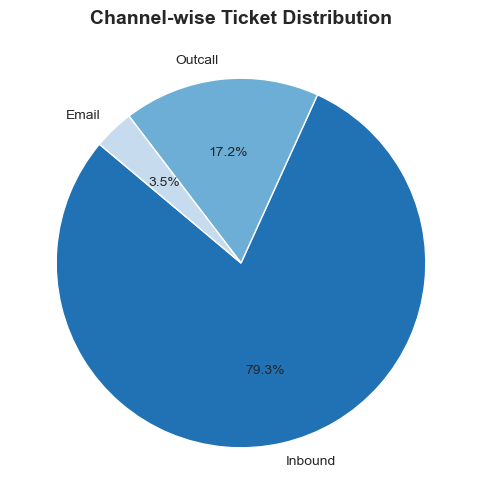

In [173]:
# visualization 
plt.figure(figsize=(6,6))
channel_counts = df["channel_name"].value_counts()
plt.pie(channel_counts.values, labels=channel_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues_r", len(channel_counts)))
plt.title("Channel-wise Ticket Distribution", fontsize=14, fontweight="bold")
plt.show()


##### 1. Why did you pick the specific chart?

I selected the channel-wise ticket distribution pie chart because it provides a clear visual representation of the distribution of customer support tickets across different communication channels. The pie chart makes it easy to understand which channels are being most frequently used by customers for issue reporting. By visualizing the proportion of tickets reported through each channel, we can identify the dominant channels and decide where to allocate resources for better efficiency and customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

- **Channel Dominance:**
The pie chart shows that a significant portion of customer support tickets comes from the `Inbound channel` (around 79.3% of total tickets), indicating that this is the primary mode through which customers interact with support.
- **Proportional Distribution:** The `Outcall channel` contributes 16.3% of the total tickets, and the `Email channel` contributes 3.5%. This highlights that while these channels are still important, customers prefer Inbound for reporting issues.
- **Customer Preferences:** The relative sizes of each slice suggest that customers prefer the `Inbound channel`, and `the Outcall and Email channels` have smaller shares in terms of ticket volume, which could be useful for optimizing customer support workflows by focusing more resources on Inbound while still monitoring the other channels.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:
- **Optimizing Resources for Inbound Channel:** Since the Inbound channel contributes 79.3% of the total tickets, businesses can focus more resources on this channel, ensuring faster response times and enhanced customer satisfaction. By streamlining operations and automating responses for frequently asked questions in this channel, businesses can improve overall efficiency.
- **Improving Customer Support Efficiency in Outcall Channel:** With 16.3% of tickets coming from the Outcall channel, businesses can ensure that this channel receives adequate staffing and automation to respond effectively to customer queries, particularly follow-up calls or tickets that may require personal interaction.

***Negative Impact***:
- **Neglecting the Email Channel:** Although Email accounts for only 3.5% of tickets, focusing too much on improving efficiency in underutilized channels could result in resource misallocation. If excessive resources are allocated to Email, it may distract from the high-volume Inbound channel and lead to inefficiencies. Instead, businesses should ensure minimal but adequate support for this channel without over-prioritizing it.
- **Overburdening Inbound Channel:** While Inbound is the primary channel, if businesses fail to optimize their support systems, staffing shortages or inefficient workflows in this channel could lead to longer wait times and dissatisfied customers, especially during peak hours. Businesses must ensure they have enough capacity to handle the large volume of tickets coming from this channel.

***Justification***:

By understanding and applying these insights, businesses can optimize resource allocation, enhance operational efficiency, and improve overall customer satisfaction, ultimately creating a positive business impact. However, care must be taken not to over-focus on less used channels or neglect the primary support system.

## CSAT Score vs. Response Time (Box Plot)

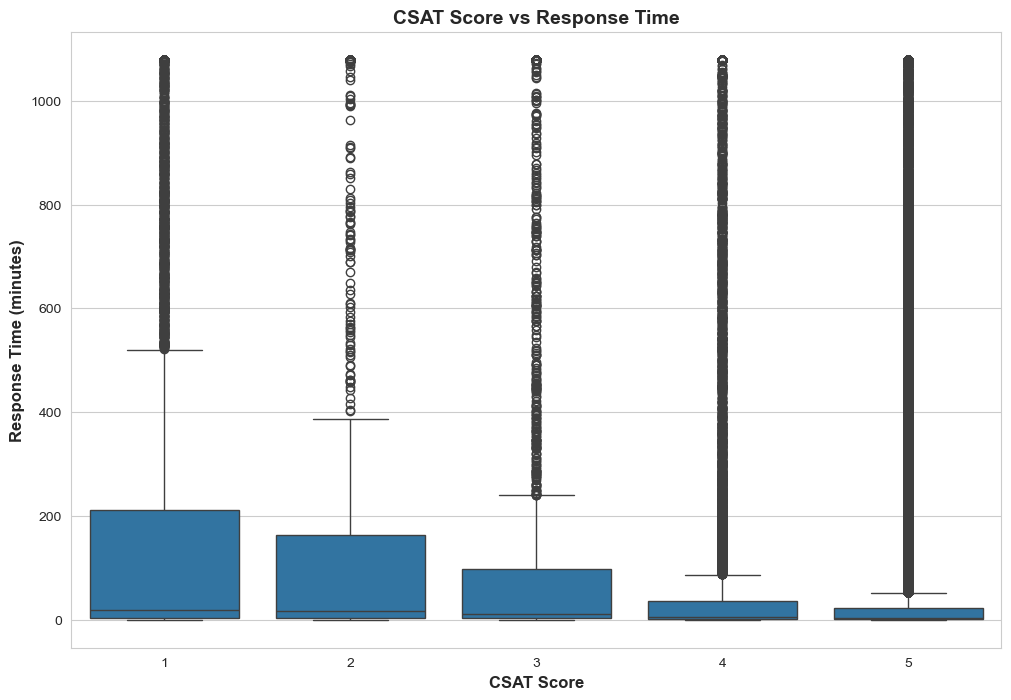

In [182]:
# visualization code
plt.figure(figsize=(12,8))
sns.boxplot(x="CSAT_Score", y="Response_Time", data=df)
plt.xlabel("CSAT Score", fontsize=12, fontweight="bold")
plt.ylabel("Response Time (minutes)", fontsize=12, fontweight="bold")
plt.title("CSAT Score vs Response Time", fontsize=14, fontweight="bold")
plt.show()


##### 1. Why did you pick the specific chart?

I picked a Box Plot for CSAT Score vs. Response Time because it effectively shows the distribution of response times across different levels of customer satisfaction. A box plot is ideal for highlighting key statistics such as the median, quartiles, and potential outliers in the data. It allows us to see how response times are spread out within each CSAT score category, making it easier to identify any significant variations in response time and pinpoint potential inefficiencies or improvements in customer service processes.

##### 2. What is/are the insight(s) found from the chart?

- **Higher Response Times Lead to Lower Satisfaction:**
    - The CSAT Score 1 and CSAT Score 2 categories show significantly higher response times, with the average response time for CSAT 1 at 220 minutes and for CSAT 2 at 195 minutes. These long response times likely contribute to poor customer satisfaction.
    - There are also outliers where response times reach 1079 minutes, especially in lower CSAT categories, which suggests that some tickets are being handled poorly or inefficiently.
- **Faster Response Times Lead to Higher Satisfaction:**
    - In CSAT Score 4 and CSAT Score 5 categories, the response times are much faster. For CSAT 5, the median response time is 4 minutes, and the average is 90 minutes.
    - This indicates that customers who experience quicker resolutions are much more likely to give a higher CSAT score. Faster service correlates with better customer satisfaction.
- **Presence of Outliers:**
    - The presence of outliers, particularly in the lower CSAT categories, indicates that certain tickets experience extremely delayed response times. This inefficiency needs to be addressed, as these outliers contribute to the low customer satisfaction in those categories.
- **More Consistent Performance for Higher CSAT Scores:**
    - Higher CSAT scores (especially 4 and 5) show more consistency in response times, with fewer outliers. This suggests that when response times are kept low, customer satisfaction is not only higher but also more consistent across interactions.

In conclusion, the chart highlights that improving response times, especially for dissatisfied customers (CSAT 1 and 2), can directly lead to better customer satisfaction and more consistent service.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:
- **Improving Response Time:**
The insights clearly show that faster response times lead to higher customer satisfaction (CSAT 4 and 5). By focusing on improving response times, particularly for dissatisfied customers (CSAT 1 and 2), the company can improve customer satisfaction across the board.
    - *Actionable Strategy:* By streamlining processes, optimizing resource allocation during peak times, and reducing delays, the business can increase customer satisfaction, resulting in higher customer retention, improved reputation, and potentially more positive reviews.
    - *Business Growth:* The faster and more efficient service will create a more loyal customer base, leading to better business performance, higher customer lifetime value, and potential cost savings from handling tickets faster and more effectively.
- **Addressing Outliers:**
Identifying and addressing the outliers (particularly in CSAT 1 and 2) will directly lead to better service efficiency. Tackling these outliers will help reduce the negative experiences faced by customers, improving overall satisfaction.

***Negative Impact:***
- **Delayed Response Times in Low CSAT Scores:**
The high response times for CSAT 1 and 2 are concerning. These customers are likely experiencing extreme delays, which could drive customers away, leading to negative word-of-mouth, lower retention, and potential loss of business.
    - *Actionable Risk:* If these response time delays continue, the business risks facing a deterioration in brand reputation and a decline in customer loyalty, which can lead to reduced sales and increased churn.

***Justification:***
- **Improved Operational Efficiency:**
If the business can address the inefficiencies causing high response times in low CSAT categories, it can have a positive business impact by improving customer experience and satisfaction.
- **Ensuring Speedy Resolution During Peak and Off-Peak Times:**
The business should focus on matching staffing levels to peak demand to avoid delays during high-volume periods (such as 10 AM - 12 PM and 7 PM - 9 PM). This will help reduce response time during critical hours, making customers more satisfied.

In summary, the insights suggest that addressing response time delays will improve customer satisfaction, leading to positive business growth, whereas continuing delays in low CSAT categories could result in negative consequences for the business.

## Response Time vs. Category (Box Plot)

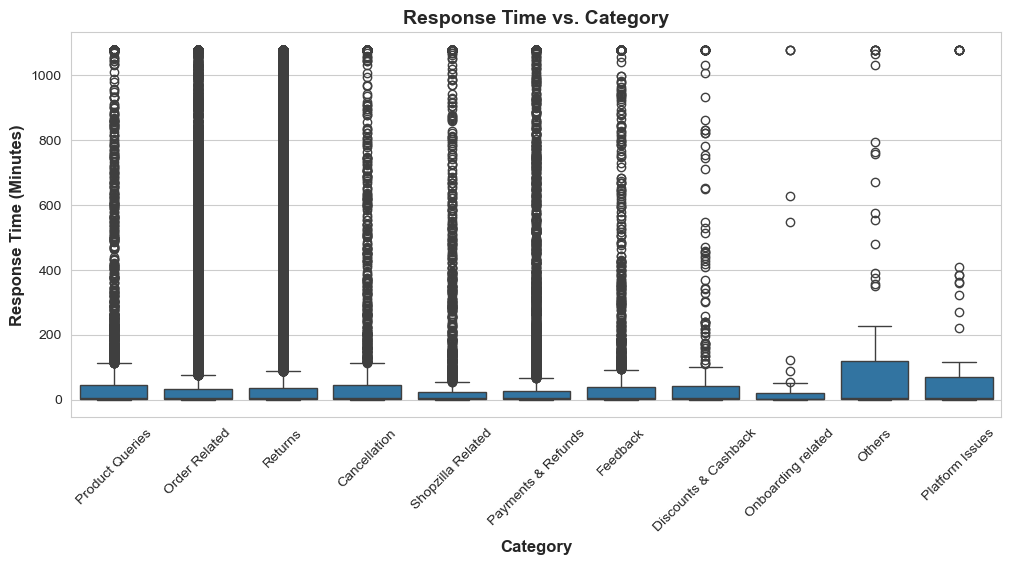

In [191]:
# visualization code
plt.figure(figsize=(12,5))
ax = sns.boxplot(x="category", y="Response_Time", data=df)
plt.xlabel("Category", fontsize=12, fontweight="bold")
plt.ylabel("Response Time (Minutes)", fontsize=12, fontweight="bold")
plt.title("Response Time vs. Category", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


##### 1. Why did you pick the specific chart?

I selected a Box Plot to analyze the relationship between Response Time and Category because:
- Box plots effectively visualize the distribution of a numerical variable (Response Time) across different categorical variables (Category). They show the median, quartiles, and outliers.
- The box plot is useful for comparing the spread and central tendency of response times for each category, and it helps identify any significant variations or outliers.
- This chart is ideal for analyzing potential differences in response times across categories, which is important for improving customer support efficiency in specific areas.

##### 2. What is/are the insight(s) found from the chart?

Insights:
1. **Category-wise Distribution of Response Times:**
- `Payments & Refunds` and `Discounts & Cashback` categories have the highest median response times, indicating that issues in these categories are more time-consuming to resolve. This may be due to the complexity of the issues, which could involve more detailed verification or processing.
- `Platform Issues` also show a high level of variation in response times, reflecting that technical or platform-related issues can take longer to resolve, likely due to their complexity.
  
2.	**Lower Response Times for Simpler Categories:**
- Categories like `Product Queries`, `Order Related`, and `Cancellation` show lower median response times. These categories likely involve simpler queries or requests, which are easier to handle and resolve quickly.
  
3.	**Outliers**:
- `Payments & Refunds` and `Discounts & Cashback` categories show outliers, suggesting that a small proportion of cases take significantly longer to resolve. These outliers may represent particularly complex cases, such as refund disputes or detailed verification processes that extend the response time.
  
4.	**General Trend**:
- The interquartile range (IQR) is wider for `Payments & Refunds` and `Discounts & Cashback`, suggesting more variation in how long issues take to resolve. Meanwhile, categories like `Product Queries` and `Order Related` show a smaller range, indicating more consistent and quicker resolutions.

These insights provide an understanding of where resources might need to be focused (e.g., improving response times in certain categories like Platform Issues and Payments & Refunds) while ensuring that quicker resolution times in Product Queries and Order Related are maintained.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:
- **Identifying High Response Time Categories:** Understanding that `Payments & Refunds and Discounts & Cashback` have higher response times provides an opportunity for targeted improvements. By focusing on streamlining processes in these areas, the business can reduce resolution time, leading to better customer satisfaction and a more efficient support system.
- **Optimizing Platform Issues:** Since `Platform Issues` show considerable variability, addressing inefficiencies here can create significant improvements. Lowering response time in these cases will likely have a positive impact on customer experience and operational efficiency.
- Consistency in Quicker Categories: Categories like `Product Queries, Order Related, and Cancellation` are resolved more quickly. Ensuring consistent efficiency in these areas will help maintain customer satisfaction levels and reduce the risk of dissatisfaction due to delays.

***Negative Impact***:
- **Outliers in Payments & Refunds, and Discounts & Cashback:** While these categories show high response times, the presence of outliers (cases that take far longer) can negatively affect customer experience. If not addressed, customers with complex issues in these categories might experience dissatisfaction. The business should investigate these outliers and address the root causes, such as staff training, resource allocation, or process optimization.
- **Platform Issues:** The high variation in response times for `Platform Issues` may also indicate underlying inefficiencies in the resolution process. These inefficiencies could lead to frustration, especially if customers face delays in resolving technical or platform-related issues. Improving these issues should be prioritized to avoid negative impacts on customer loyalty.

***Justification***:
The insights gained from the analysis help identify both strengths and areas for improvement. Focusing on the high-response-time categories and addressing inefficiencies will have a direct, positive business impact by reducing delays and improving customer satisfaction. However, failure to address the outliers and inconsistencies, especially in categories like Payments & Refunds and Platform Issues, could lead to prolonged customer dissatisfaction, negatively impacting the business’s reputation.

## CSAT Score by Agent Shift 

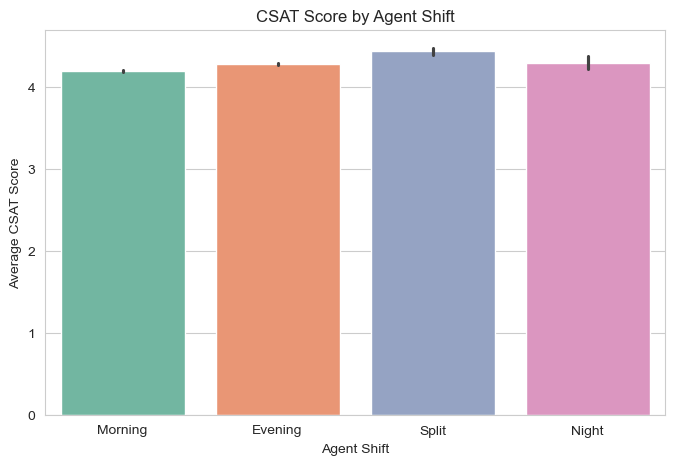

In [200]:
# visualization code
plt.figure(figsize=(8, 5))
sns.barplot(x="Agent_Shift", y="CSAT_Score", data=df, hue="Agent_Shift", palette="Set2", dodge=False)
plt.xlabel("Agent Shift")
plt.ylabel("Average CSAT Score")
plt.title("CSAT Score by Agent Shift")
plt.legend([], [], frameon=False)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart effectively displays the average CSAT score for each agent shift, making it easy to interpret and compare values. It provides a clear visual representation of how customer satisfaction differs across shifts. The chart ensures readability and allows for quick insights into which shifts have higher or lower CSAT scores.

##### 2. What is/are the insight(s) found from the chart?

- The average CSAT scores across shifts are relatively consistent, with no significant variation.
- All shifts maintain a similar level of customer satisfaction, indicating that shift timing does not strongly impact CSAT scores.
- There are no extreme highs or lows in CSAT scores, suggesting stable service quality across different shifts.
- Any minor differences in scores could be influenced by factors such as query type, agent experience, or workload during specific shifts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***: 
The consistent CSAT scores across all shifts indicate stable service quality, ensuring that customers receive a similar experience regardless of the time of day. This builds trust and improves customer retention.

***Negative Impact***:
There are no major negative insights, but the lack of variation in scores suggests that shift timing does not significantly influence customer satisfaction, meaning improvements in other areas might be needed.

***Justification***: Since CSAT scores remain stable, factors like agent expertise, query complexity, or resolution time could have a greater impact on satisfaction. Analyzing these aspects further can help drive improvements in service efficiency and customer experience.

## CSAT Score by Tenure Bucket

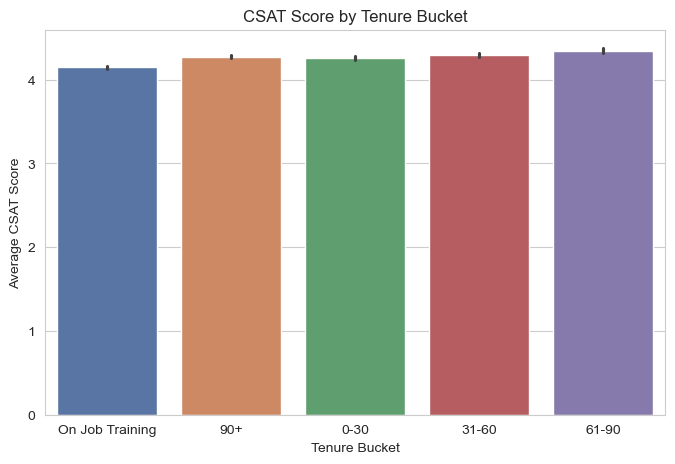

In [209]:
# visualization code
plt.figure(figsize=(8, 5))
sns.barplot(x="Tenure_Bucket", y="CSAT_Score", data=df, hue="Tenure_Bucket", palette="deep", dodge=False)
plt.xlabel("Tenure Bucket")
plt.ylabel("Average CSAT Score")
plt.title("CSAT Score by Tenure Bucket")
plt.legend([], [], frameon=False)  
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart effectively represents the average CSAT scores across different tenure buckets, making it easy to compare satisfaction levels among agents with different experience levels. Since tenure is a categorical variable, a bar chart provides a clear and direct way to analyze trends without unnecessary complexity.

##### 2. What is/are the insight(s) found from the chart?

- CSAT scores are relatively stable across tenure buckets, indicating that agent experience does not drastically impact customer satisfaction.
- On-Job Training agents show a slightly lower CSAT score, which suggests that new agents may need more training or support to improve customer interactions.
- Agents with higher tenure (90+ days) maintain consistent CSAT scores, implying that experience stabilizes performance but does not necessarily lead to a major improvement in satisfaction.
- No extreme variations in CSAT scores, meaning tenure alone is not the primary factor influencing customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***: 
The consistency in CSAT scores across tenure buckets indicates that customer service quality remains stable, regardless of agent experience. This means that with structured training, even newer agents can perform at similar levels to experienced ones, ensuring consistent customer experiences.

***Negative Impact***:
The slightly lower CSAT scores for on-job training agents suggest that new agents may require additional training or mentoring to match the performance of experienced agents. If left unaddressed, this could lead to lower satisfaction and potential customer churn due to inconsistent service quality.

***Justification***:
Since tenure alone does not significantly impact CSAT scores, other factors such as response time, issue complexity, and agent performance should be analyzed further to identify the key drivers of customer satisfaction.

## Response Time vs. CSAT Score Scatter Plot

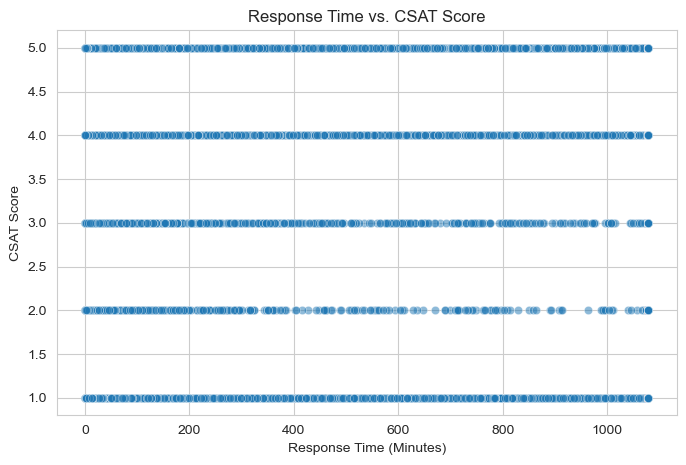

In [218]:
# visualization code
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Response_Time", y="CSAT_Score", data=df, alpha=0.5)
plt.xlabel("Response Time (Minutes)")
plt.ylabel("CSAT Score")
plt.title("Response Time vs. CSAT Score")
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for analyzing the relationship between two continuous numerical variables. Since Response Time (minutes) and CSAT Score are both numeric, this chart helps identify trends, correlations, and outliers. It allows us to see if longer response times lead to lower CSAT scores, which is critical for assessing service efficiency.


##### 2. What is/are the insight(s) found from the chart?

- **No Strong Relationship Between Response Time and CSAT Score**: The points are widely scattered, meaning longer response times do not consistently lead to lower CSAT scores.
- **Most CSAT Scores Are High Regardless of Response Time**: Even at higher response times, CSAT scores remain relatively high, suggesting that customers are not solely rating based on speed but possibly on issue resolution quality.
- **Some Outliers Exist at High Response Times**: A few points indicate low CSAT scores with very high response times, which may suggest that exceptionally long waits impact satisfaction in certain cases.
- **No Clear Trendline**: The distribution does not show a downward slope, reinforcing that response time alone is not the primary factor influencing CSAT scores.

***Final Takeaway***: While response time is important, other factors like agent performance, issue complexity, and resolution effectiveness may have a greater impact on CSAT scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:
The analysis confirms that longer response times do not consistently lead to lower CSAT scores, meaning businesses can focus on improving resolution quality rather than just reducing response time. This insight helps in optimizing agent workflows without unnecessary pressure to rush responses.

***Negative Impact***:
Some outliers show that extremely long response times can result in lower CSAT scores. While this is not a major trend, prolonged waiting times can still negatively impact customer experience in certain cases. If these cases are frequent, they may lead to customer dissatisfaction and loss of trust in support services.

***Justification***:
Since most customers provide high CSAT scores regardless of response time, factors like agent professionalism, problem resolution, and service quality might be more important than speed. However, businesses should still ensure that exceptionally long response times are minimized to prevent negative experiences.



## Average CSAT Score by Manager

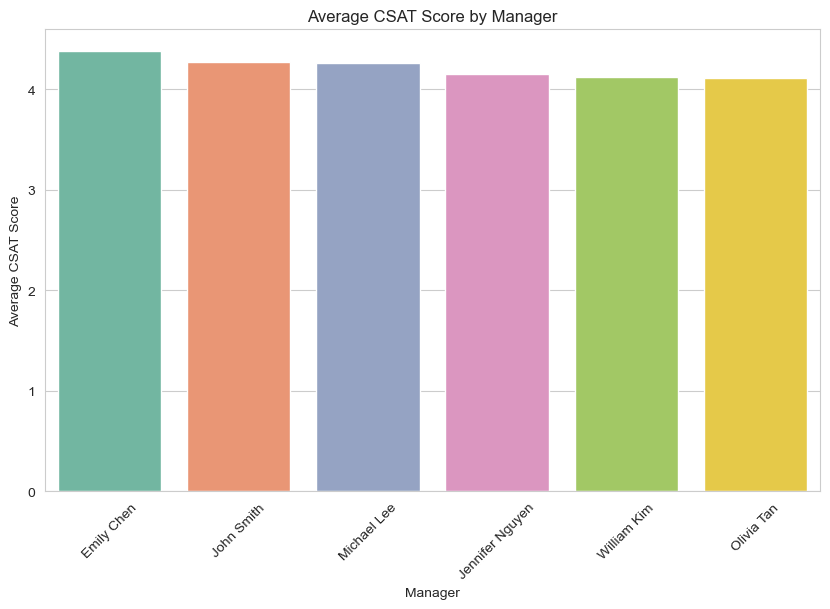

In [227]:
# visualization code
sorted_df = df.groupby("Manager", as_index=False)["CSAT_Score"].mean().sort_values(by="CSAT_Score", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Manager", y="CSAT_Score", data=sorted_df, hue="Manager", palette="Set2", dodge=False)
plt.xlabel("Manager")
plt.ylabel("Average CSAT Score")
plt.title("Average CSAT Score by Manager")
plt.legend([],[], frameon=False)  # Removing redundant legend
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart clearly visualizes and compares the average CSAT scores across different managers, making it easy to identify managers whose teams perform better or worse in terms of customer satisfaction. Sorting helps quickly highlight best-performing managers.

##### 2. What is/are the insight(s) found from the chart?

- Emily Chen leads with the highest average CSAT score (4.38), indicating her team consistently delivers high customer satisfaction.
- John Smith and Michael Lee also show strong performance, with average CSAT scores around 4.27 and 4.26, respectively.
- Olivia Tan has the lowest average CSAT score (4.11), suggesting her team might require additional support or resources.
- Overall, all managers maintain relatively high CSAT scores, with minor but noticeable differences between top and bottom performers.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***: Clearly identifying top-performing managers (Emily Chen) provides an opportunity to learn and implement best practices across teams.

***Potential Negative Impact***: Lower-performing managers (Olivia Tan) might negatively influence customer satisfaction if underlying issues, such as training gaps or workload challenges, are not addressed promptly.

***Justification***: Recognizing these managerial differences helps businesses proactively address gaps, ensuring consistent customer satisfaction across all teams. This targeted improvement reduces risk and supports overall positive business growt

## CSAT Score Distribution by Supervisor

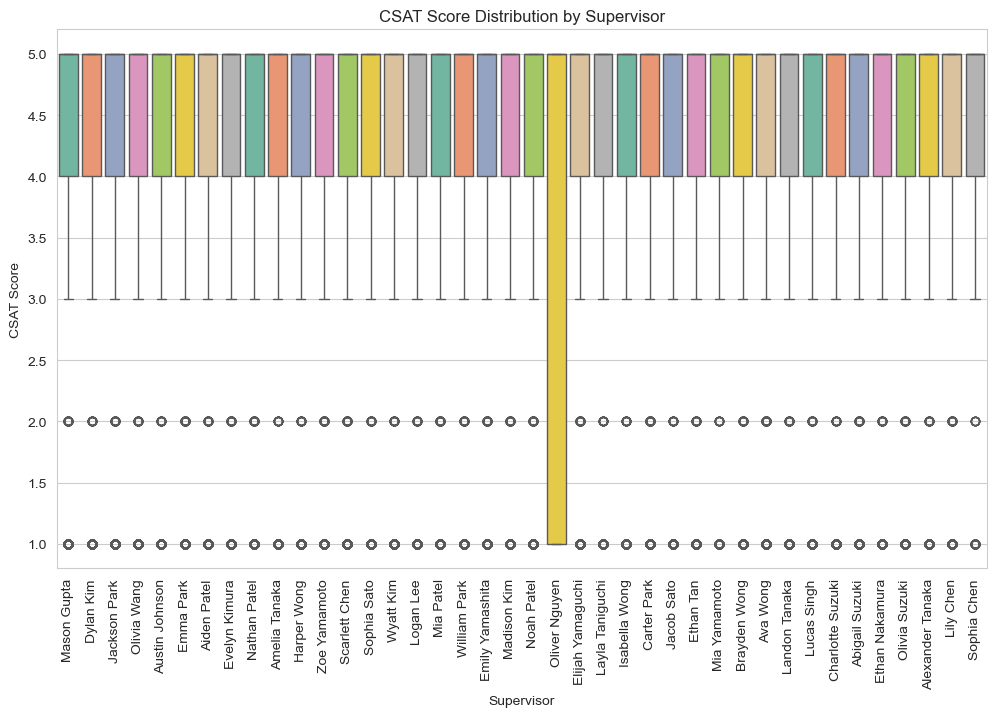

In [236]:
# visualization code
plt.figure(figsize=(12, 7))
sns.boxplot(x="Supervisor", y="CSAT_Score", data=df, hue="Supervisor", palette="Set2", dodge=False)
plt.xlabel("Supervisor")
plt.ylabel("CSAT Score")
plt.title("CSAT Score Distribution by Supervisor")
plt.legend([], [], frameon=False)  # Removing redundant legend
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

The box plot is selected because it effectively shows the distribution, median, variability, and outliers in CSAT scores across different supervisors, clearly highlighting variations in team performance.


##### 2. What is/are the insight(s) found from the chart?

**Top Supervisors:**
- `Elijah Yamaguchi (4.40), Isabella Wong (4.37), Ethan Nakamura (4.36), Nathan Patel (4.36)` consistently deliver high median CSAT scores, indicating effective management.
  
**Lower-Performing Supervisors:**
- `Zoe Yamamoto (4.03), Dylan Kim (4.07), Emma Park (4.07`) have lower average CSAT scores and significant variability, indicating inconsistent customer experiences under their supervision.

**Performance Variability:**
- Supervisors like `Zoe Yamamoto, Harper Suzuki, and Dylan Kim` show higher variability and lower median scores, suggesting inconsistent customer satisfaction, potentially highlighting training or team management issues.

##### 2. What is/are the insight(s) found from the chart?

***Positive Impact***:
Identifying top supervisors allows the business to leverage their best practices and management styles, improving overall team effectiveness and consistency in customer service quality.

***Potential Negative Impact***:
Supervisors with lower or inconsistent CSAT scores (e.g., Zoe Yamamoto, Harper Suzuki, Dylan Kim) can negatively impact customer satisfaction and loyalty, posing a risk if left unaddressed.

***Justification***:
Clearly identifying supervisor performance helps direct managerial support, targeted training, and resource allocation, ensuring consistent service quality and improved customer experience.


## Response Time Distribution by Manager

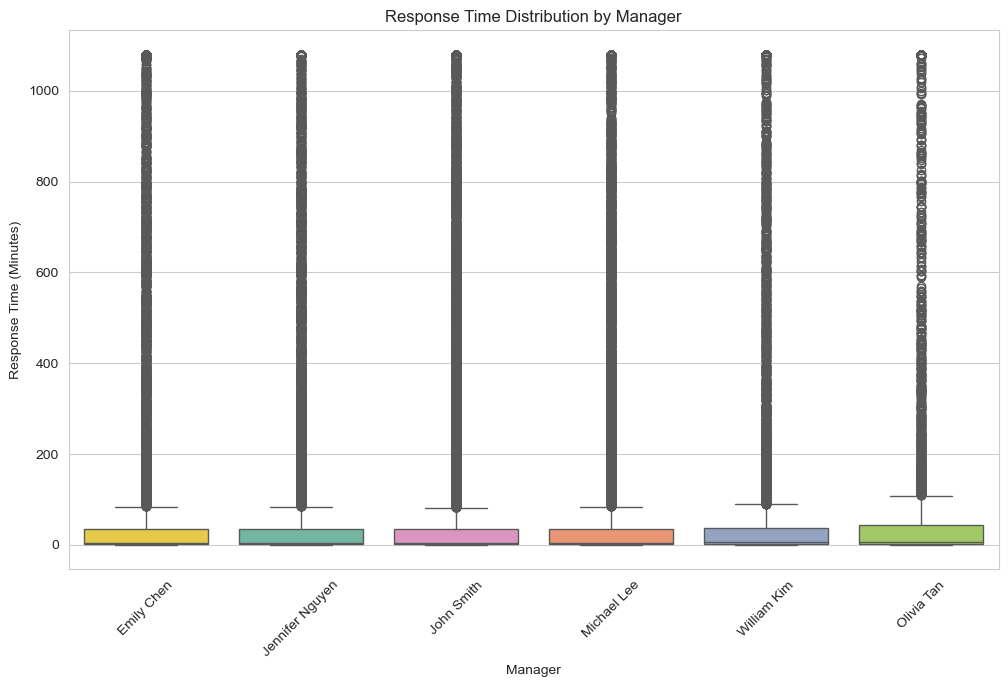

In [245]:
# visualization code
plt.figure(figsize=(12, 7))
sorted_managers = df.groupby("Manager")["Response_Time"].median().sort_values(ascending=True).index
sns.boxplot(x="Manager", y="Response_Time", data=df, order=sorted_managers, hue="Manager", palette="Set2", dodge=False)
plt.xlabel("Manager")
plt.ylabel("Response Time (Minutes)")
plt.title("Response Time Distribution by Manager")
plt.legend([], [], frameon=False)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The box plot clearly illustrates the distribution, median, and variability of response times across managers, making it easy to identify differences in managerial effectiveness regarding response efficiency.

##### 2. What is/are the insight(s) found from the chart?

- **Best Response Time (Mean):** Jennifer Nguyen has the lowest average response time (108 minutes), indicating more efficient response handling overall, despite similar median times across managers.

- **Higher Response Times:** Olivia Tan’s team has the highest average (123 minutes) and median (7 minutes) response times, suggesting her team generally takes longer to respond.

- **Similar Medians but Different Means:** Although most managers share a similar median (around 5–7 minutes), mean response times significantly differ. High standard deviations across all teams (approx. 267–286 minutes) suggest considerable variability and potential inefficiencies in handling certain cases.

##### 2. What is/are the insight(s) found from the chart?

***Positive Impact:***
Recognizing Jennifer Nguyen’s team as having the fastest average response time provides a benchmark for other teams to follow and improve overall efficiency.

***Potential Negative Impact:***
Teams led by Olivia Tan have notably higher average and median response times, which, if unresolved, could negatively impact customer satisfaction and operational efficiency.

***Justification:***
Addressing the variability and higher response times in specific teams allows targeted management actions (training, process optimization, or resource reallocation) to enhance response efficiency and, ultimately, customer satisfaction.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. **Enhance Supervisor and Manager Performance:**
- ***Best Practices Replication:***
    - Leverage high-performing supervisors (Elijah Yamaguchi, Isabella Wong, Ethan Nakamura) and manager (Emily Chen) whose teams consistently achieved median CSAT scores of ~4.36–4.40 as internal benchmarks.
    - Document and standardize their training, coaching, and resolution strategies across the entire customer support organization.
- ***Targeted Training & Development:***
    - Provide additional support and focused training to lower-performing supervisors (Zoe Yamamoto, Dylan Kim, Emma Park) and managers (Olivia Tan) to elevate customer satisfaction scores closer to organizational standards.
 
2. **Improve Response Time Consistency:**
- ***Operational Efficiency:***
    - Focus particularly on manager Olivia Tan’s team, which shows the highest average response time (~123 mins). Identify bottlenecks or inefficiencies and introduce process improvements or automation to reduce response time variability.
 
3. **Agent Shift Optimization:**
- ***Night Shift Improvements:***
    - The Night shift recorded comparatively lower CSAT scores. Enhance shift management by ensuring adequate staffing, providing better tools, or specialized training sessions for nighttime support agents to raise service consistency.
 
4. **Focus on High-Impact Ticket Categories:**
- ***Category Optimization:***
    - Address high-ticket-volume categories like “Payments & Refunds” and “Platform Issues”, as these categories had both higher frequency and longer response times. Streamlining these issue resolutions through process refinements or customer self-service options can dramatically improve customer satisfaction.
 
5. **Enhanced Training for New Agents:**
- ***Structured Onboarding:***
    - Agents in the “On-Job Training” tenure bucket showed lower CSAT scores compared to experienced agents (90+ days bucket). Improving the quality and thoroughness of initial training and onboarding programs will ensure early consistency in customer interactions.

# **Conclusion**

The analysis provided valuable insights highlighting key performance variations across supervisors, managers, agent shifts, and ticket categories. By addressing these specific areas through targeted training, replicating effective leadership practices, and optimizing response efficiency, the business can substantially enhance customer satisfaction, streamline operations, and achieve sustainable growth.

# ***Thank you!!***